In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("suv_data.csv")
## Collection of data complete

In [3]:
data.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


## Analysis of data begins

In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# Since there are no NAN values, we are good to go

### Identify the columns which have non integer values and then replace them with integer values as follows

In [6]:
sex = pd.get_dummies(data["Gender"], drop_first = True) # cool
data.drop("Gender", axis = 1, inplace = True)

Delete irrelevant columns which have absolutely no effect on the chances of a person purchasing a car

In [7]:
data.drop("User ID", axis = 1, inplace = True)

In [8]:
# Concat the data with column "sex"
data = pd.concat([data, sex], axis = 1)

In [9]:
data.head(4)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0


In [10]:
data.describe()

,Age,EstimatedSalary,Purchased,Male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


<AxesSubplot:xlabel='Purchased', ylabel='count'>

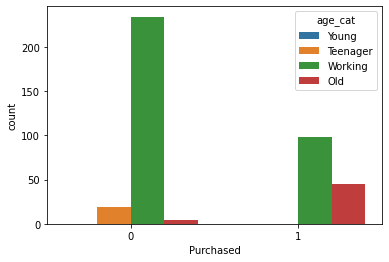

In [11]:
data["age_cat"] = pd.cut(data["Age"], bins = [0, 13, 20, 50, 60], labels = ["Young", "Teenager", "Working", "Old"])
sns.countplot(x = "Purchased", hue = "age_cat", data = data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

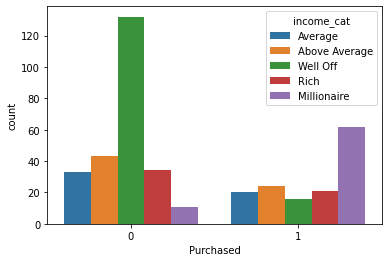

In [12]:
data["income_cat"] = pd.cut(data["EstimatedSalary"], bins = [15000, 30000, 50000, 80000, 100000, 150000], labels = ["Average", "Above Average", "Well Off", "Rich", "Millionaire"]) 
sns.countplot(x = "Purchased", hue = "income_cat", data = data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

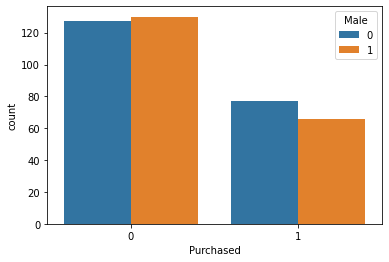

In [13]:
sns.countplot(x = "Purchased", hue = "Male", data = data)

# Training

In [14]:
from sklearn.model_selection import cross_val_score, train_test_split

In [15]:
data.head(1)

,Age,EstimatedSalary,Purchased,Male,age_cat,income_cat
0,19,19000,0,1,Teenager,Average


In [16]:
def l():
    a = np.empty(3)
    j = 0
    for i in range(4):
        if i != 2:
            a[j] = i
            j += 1
    return a

data.drop(["age_cat", "income_cat"], axis = 1, inplace = True)

In [17]:
X = data.iloc[ : , l()]
y = data.loc[ : , "Purchased"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [35]:
clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)

y_test_pred = clf_log.predict(x_test)


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        73
           1       1.00      0.00      0.00        47

    accuracy                           0.61       120
   macro avg       0.80      0.50      0.38       120
weighted avg       0.76      0.61      0.46       120

